<a href="https://colab.research.google.com/github/TutuBraz/bellabeat-custumer-behavior/blob/main/bellabeat_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema.
A Urška solicita que você analise os dados de uso de dispositivos inteligentes para obter informações sobre como os consumidores usam dispositivos inteligentes que não são da Bellabeat. Em seguida, ela quer que você selecione um produto da Bellabeat para aplicar esses insights em sua apresentação.

Perguntas: 
1. Como os usuários dormem?
2. Quais são os horários de maior intensidade de exercicios, existe uma rotina?
3. Tendência no uso do dispositivo.

**Tarefe de negócio:**
Identificar o comportamento de cliente que utilizam dispositivos inteligentes que não são Bellabeat, e aplicar esse conhecimento para melhorar o aplicativo da Bellbeat

*Aplicativo Bellabeat:* O aplicativo Bellabeat fornece aos usuários dados de saúde relacionados à sua atividade, sono, estresse, ciclo menstrual e hábitos de atenção plena. Esses dados podem ajudar os usuários a entender melhor seus hábitos atuais e tomar decisões saudáveis. O aplicativo Bellabeat se conecta à sua linha de produtos inteligentes de bem-estar.

#Preparar.

Meta dados: https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf

O conjunto de dados foi obtido através do Kaggle e contém um rastreador de condicionamento físico pessoal de trinta usuários do Fitbit, uma empresa estadunidense de eletrônicos e fitness. Trinta usuários elegíveis do Fitbit consentiram com o envio de dados pessoais do rastreador, incluindo os resultados a cada minuto de atividade física, frequência cardíaca e monitoramento do sono. São abrangidas informações sobre atividades diárias, passos e frequência cardíaca que podem ser usadas para explorar os hábitos dos usuários.

Os data frames utilizados são:
* dailyActivity_merged.csv
* sleepDay_merged.csv
* hourlyIntensities_merged.csv

Obs: A única tabela no formato longo é a  "dailyActivity_merged.csv".

**Integridade:** 
>Verificar se os dados estão completos, duplicados ou faltando. Para verificação criei uma função que verifica a quantidade de usúarios, a quantidade de dados duplicados e a quantidade de dados faltantes.  

>A tabela sleep_day possui 24 usúarios, como ela é vital para análise e possui uma quantidade relativamente próximado total não irei descarta-la.

In [ ]:
#manipulacao
import pandas as pd

#datas
from datetime import datetime

#vizualizacao
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Funcao para verificaar a integridade dos dados
def Integridade(dataset, col='Id', col2='Time'):
  print(f'Quantidade de usuários: {len(dataset[col].unique())}')
  print(f'Valors duplicados: {dataset.duplicated().sum()}')
  print(f'Valores ausentes:{dataset.isnull().sum()}')

In [ ]:
#resumo das atividades dos usúarios
day_activity = pd.read_csv('/content/dailyActivity_merged.csv')
Integridade(day_activity)

Quantidade de usuários: 33
Valors duplicados: 0
Valores ausentes:Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [ ]:
day_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
#minutos dormidos por dia
sleep_day =pd.read_csv('/content/sleepDay_merged.csv')
Integridade(sleep_day)

Quantidade de usuários: 24
Valors duplicados: 3
Valores ausentes:Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64


In [ ]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [ ]:
#Intensidade dos usúarios
hour_intensities = pd.read_csv('/content/hourlyIntensities_merged.csv')
Integridade(hour_intensities)

Quantidade de usuários: 33
Valors duplicados: 0
Valores ausentes:Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64


In [ ]:
hour_intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


#Processar.

 Existem valores duplicados na tabela sleep_day, estes valores serão excluidos. 
 
Criei duas funções para expandir os valores da coluna que marcar o dia e a hora nos data frames sleep_day e hour_intensities. A partir desta coluna foram criadas três nova colunas, uma que marca a data, outra o dia e por último a hora. E para o data frame day_activity foram criadas apenas duas coluna, data e dia_semana.

Foi criado um novo data frame com uma junção entre sleep_day e day_activity chamado de merge_sleep_activity.

A coluna que horiginalmente marcava a data e a hora foi excluída.





In [ ]:
#Removendo duplicatas do dataset sleep_day
sleep_day = sleep_day.drop_duplicates()

#Verificando a integridade
Integridade(sleep_day)

Quantidade de usuários: 24
Valors duplicados: 0
Valores ausentes:Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64


In [ ]:
def DiasSemana(dataset, col):
  #transformando a coluna para tipo date
  dataset.ActivityDate = pd.to_datetime(dataset[col], format="%m/%d/%Y")
  
  #Criando coluna dias da semana
  dia_semana = pd.to_datetime(dataset[col]).dt.strftime('%A')

  #Inserir dia da semana como uma nova coluna no dataframe
  dataset.insert(2, 'dia_semana', dia_semana)

  return dataset.head()

In [ ]:
#Funcao para transformar o formato de 12 horas e 24 horas
def convert24(str1): 
    if str1[-2:] == "AM" and str1[:2] == "12": 
        return "00" + str1[2:-2] 
          
    elif str1[-2:] == "AM": 
        if str1[:2] == '10' or str1[:2] == '11':
          return str1[:-2] 
        else: 
          return '0'+str1[:-2] 
    
    elif str1[-2:] == "PM" and str1[:2] == "12": 
        return str1[:-2] 
          
    else: 
        if ':' not in str1[:2]:
          return str(int(str1[:2]) + 12) + str1[2:8]
        
        else:
          hora =  str(int(str1[:1]) + 12) + str1[2:8] 
          return hora[:2]+':'+hora[2:]

def separa(df, col):
  df['data'], df['hora'] = df[col].str.split(' ', 1).str

In [ ]:
#Criando colunas data e hora
separa(hour_intensities, 'ActivityHour')
separa(sleep_day, 'SleepDay')


#Aplicando a função em todas as linhas
hour_intensities['hora'] = hour_intensities['hora'].apply(convert24)
sleep_day['hora'] = sleep_day['hora'].apply(convert24)


#renomeando coluna
day_activity.rename(columns={'ActivityDate': 'data'}, inplace=True)

#criando coluna dias da semana
DiasSemana(hour_intensities, 'data')
DiasSemana(sleep_day, 'data')
DiasSemana(day_activity, 'data')


#removendo coluna
hour_intensities.drop(['ActivityHour'], axis=1, inplace = True)
sleep_day.drop(['SleepDay'], axis=1, inplace = True)


#reorganizando as colunas
hour_intensities = hour_intensities[['data','dia_semana' ,'hora','TotalIntensity',	'AverageIntensity']]
sleep_day = sleep_day[['Id','data','dia_semana','TotalSleepRecords', 'TotalMinutesAsleep',	'TotalTimeInBed']]

<ipython-input-13-11371d2045dd>:24: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['data'], df['hora'] = df[col].str.split(' ', 1).str
<ipython-input-13-11371d2045dd>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'], df['hora'] = df[col].str.split(' ', 1).str
<ipython-input-12-733d16e72ccc>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataset.ActivityDate = pd.to_datetime(dataset[col], format="%m/%d/%Y")


In [ ]:
#merge
merge_sleep_activity= pd.merge(sleep_day,day_activity, on = ['Id', 'data'],  
                  )
merge_sleep_activity.head()

,Id,data,dia_semana_x,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,dia_semana_y,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,Tuesday,1,327,346,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,Wednesday,2,384,407,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/15/2016,Friday,1,412,442,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
3,1503960366,4/16/2016,Saturday,2,340,367,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
4,1503960366,4/17/2016,Sunday,1,700,712,Sunday,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728


#Analisar.

In [ ]:
#cores da marca:
bella_colors = ['#000000', '#fe8f77', '#eed9f8']

#Subindo fonte que será utilizada
import matplotlib.font_manager as fm
fprop = fm.FontProperties(fname='/content/Poppins-Bold.ttf')

### Como os usuários dormem?

In [ ]:
#nova coluna com a quantidade de tempo que os usuarios ficam acordados na cama
sleep_day['JustBed'] = sleep_day['TotalTimeInBed']-sleep_day['TotalMinutesAsleep']

In [ ]:
sleep_day.head()

,Id,data,dia_semana,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,JustBed
0,1503960366,4/12/2016,Tuesday,1,327,346,19
1,1503960366,4/13/2016,Wednesday,2,384,407,23
2,1503960366,4/15/2016,Friday,1,412,442,30
3,1503960366,4/16/2016,Saturday,2,340,367,27
4,1503960366,4/17/2016,Sunday,1,700,712,12


In [ ]:
sleep_day.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,JustBed
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927,39.309756
std,2.060863e+09,0.346636,118.635918,127.455140,46.710932
min,1.503960e+09,1.000000,58.000000,61.000000,0.000000
25%,3.977334e+09,1.000000,361.000000,403.750000,17.000000
50%,4.702922e+09,1.000000,432.500000,463.000000,25.500000
75%,6.962181e+09,1.000000,490.000000,526.000000,40.000000
max,8.792010e+09,3.000000,796.000000,961.000000,371.000000


In [ ]:
#mediana  
sleep_day.TotalMinutesAsleep.median()

432.5

Os usuários analisados apresentaram uma média de 419,17 minutos dormidos e uma mediana de 432,5 minutos dormidos, o que signica que em média e mediana os usuários estão preenchendo o minimo necessário de horas de sono por dia.

In [ ]:
#Agrupamento por dia da média total de dias dormidos.
grp_sleep_day = sleep_day.groupby(['data']).mean()

#Existe uma inconsistencia na ordem das datas
datas = grp_sleep_day.iloc[20:23]

#removendo 
grp_sleep_day.drop(['5/10/2016', '5/11/2016', '5/12/2016'],
                   inplace=True)

#Adiciaonado
grp_sleep_day = grp_sleep_day.append(datas)

grp_sleep_day.tail()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,JustBed
data,,,,,
5/8/2016,4.641623e+09,1.142857,442.857143,485.071429,42.214286
5/9/2016,5.044086e+09,1.000000,416.181818,442.636364,26.454545
5/10/2016,4.654644e+09,1.000000,407.416667,446.250000,38.833333
5/11/2016,4.994948e+09,1.000000,438.545455,463.545455,25.000000
5/12/2016,5.434394e+09,1.000000,442.375000,470.250000,27.875000


[]

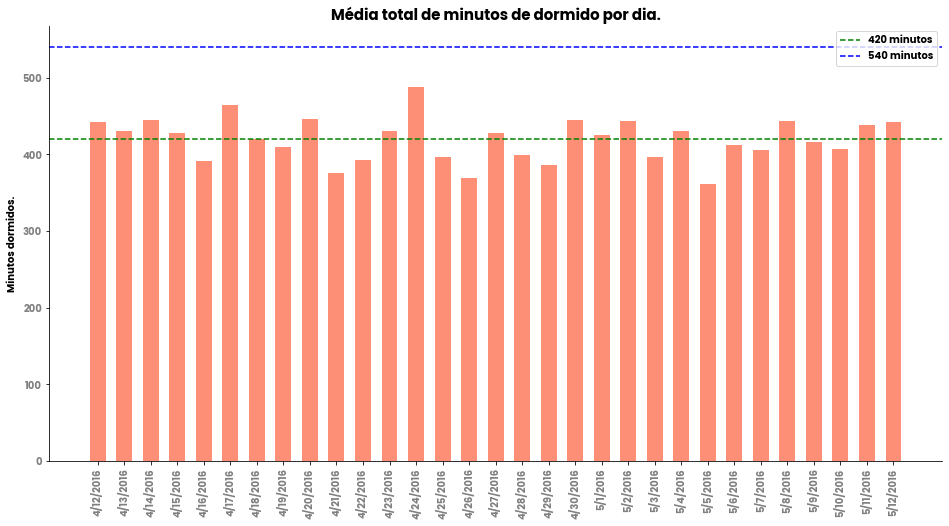

In [ ]:
#Gráfico de média total por dia.

#Inician figura
fig, ax = plt.subplots(figsize=(16,8))

#Desenhando o gráfico
plt.bar(grp_sleep_day.index,grp_sleep_day['TotalMinutesAsleep'], width=0.6, color=bella_colors[1])

#Colocando os rótulos do x na vertical
plt.xticks(rotation=90)

#Desenhando linhas horizontais
plt.axhline(420, linestyle='dashed', color='green', label='420 minutos')
plt.axhline(540, linestyle='dashed', color='blue', label='540 minutos')

#tirando as colunas
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

#tirando grid
ax.grid(False)

#titulo
plt.title('Média total de minutos de dormido por dia.', fontproperties=fprop, fontsize=15, color=bella_colors[0])

#Nome do eixo y
plt.ylabel('Minutos dormidos.',fontproperties=fprop,fontsize=10)

#Configulando rotulos
ax.set_xticklabels(grp_sleep_day.index,fontproperties=fprop, color='grey')
ax.set_yticklabels([0,100,200,300,400,500],fontproperties=fprop, color='grey')


#legenda
plt.legend(loc='best',prop=fprop)

plt.plot()

Em média, pelo menos metade do mês os usúarios não dormem o mínimo necessário.

In [ ]:
#Agrupento por dia de mediana total de dias dormidos.
grp_sleep_day = sleep_day.groupby(['data']).median()
grp_sleep_day.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,JustBed
data,,,,,
4/12/2016,4.702922e+09,1.0,429.0,464.0,23.0
4/13/2016,5.128440e+09,1.5,439.5,461.5,31.5
4/14/2016,5.553957e+09,1.0,445.0,489.0,27.0
4/15/2016,4.445115e+09,1.0,412.0,442.0,26.0
4/16/2016,4.574018e+09,1.0,394.0,446.5,25.5


[]

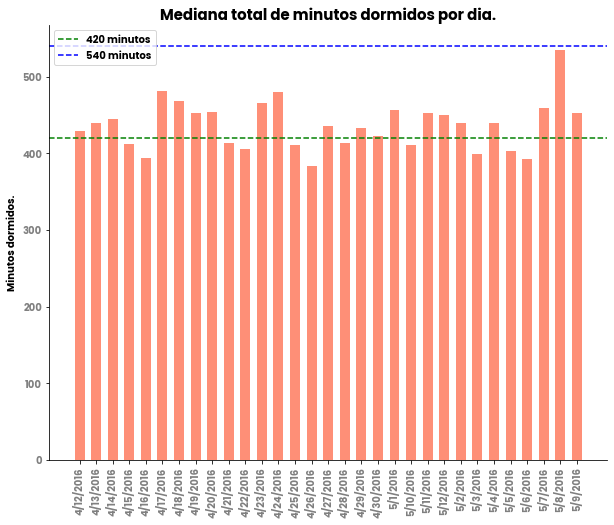

In [ ]:
#Gráfico da mediana total por dia.
fig, ax = plt.subplots(figsize=(10,8))

plt.bar(grp_sleep_day.index,grp_sleep_day['TotalMinutesAsleep'], width=0.6, color=bella_colors[1])

plt.xticks(rotation=90)

plt.axhline(420, linestyle='dashed', color='green', label='420 minutos')
plt.axhline(540, linestyle='dashed', color='blue', label='540 minutos')

plt.title('Mediana total de minutos dormidos por dia.', fontproperties=fprop, fontsize=15, color=bella_colors[0])

plt.ylabel('Minutos dormidos.', fontproperties=fprop, fontsize=10, color=bella_colors[0])

ax.grid(False)

for spine in ['top','right']:
  ax.spines[spine].set_visible(False)

ax.set_xticklabels(grp_sleep_day.index,fontproperties=fprop, color='grey')
ax.set_yticklabels([0,100,200,300,400,500],fontproperties=fprop, color='grey')


plt.legend(prop=fprop)
plt.plot()

Em mediana, pelo em 11 os usúarios não dormem o mínimo necessário.

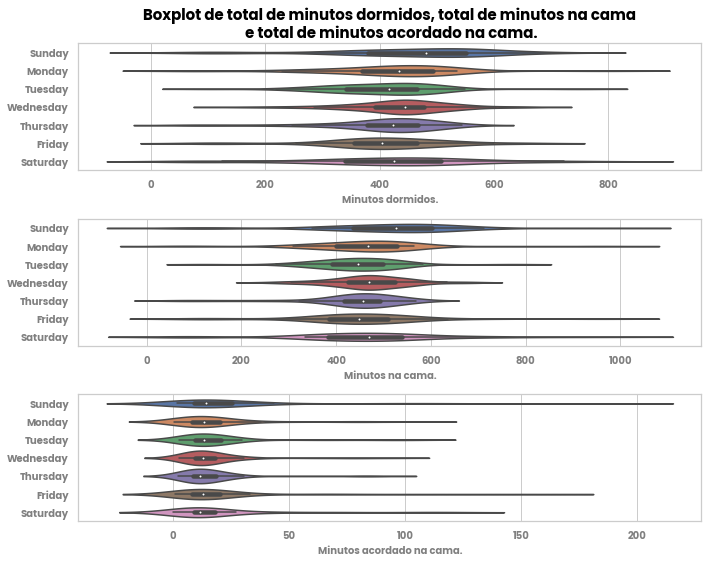

In [ ]:
dia_semana= ['Sunday','Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
#violinplot dos minutos totais de sono por dia da semana.
sns.set(style='whitegrid')

#Iniciando a figura
fig,axes = plt.subplots(3,1, figsize=(10,8))



#Primeiro grafico
sns.violinplot(x='TotalMinutesAsleep', y='dia_semana', data = sleep_day,
            ax = axes[0], order = dia_semana)
#formatando as labels
axes[0].set_ylabel('')
axes[0].set_xlabel('Minutos dormidos.',fontproperties=fprop, color='grey')
#formatando os ticks
axes[0].set_yticklabels(dia_semana,fontproperties=fprop, color='grey')
axes[0].set_xticklabels(range(-200,1200,200),fontproperties=fprop, color='grey')



#segundo gráfico
sns.violinplot(x='TotalTimeInBed', y='dia_semana', data = sleep_day,
            ax = axes[1],order = dia_semana)
#formatando as labels
axes[1].set_ylabel('')
axes[1].set_xlabel('Minutos na cama.',fontproperties=fprop, color='grey')
#formatando os ticks
axes[1].set_yticklabels(dia_semana,fontproperties=fprop, color='grey')
axes[1].set_xticklabels(range(-200,1200,200),fontproperties=fprop, color='grey')



#Terceiro gráfico
sns.violinplot(x='JustBed', y='dia_semana', data = sleep_day,
            ax = axes[2],order = dia_semana)
#formatando as labels
axes[2].set_ylabel('')
axes[2].set_xlabel('Minutos acordado na cama.',fontproperties=fprop, color='grey')
#formatando os ticks
axes[2].set_yticklabels(dia_semana,fontproperties=fprop, color='grey')
axes[2].set_xticklabels(range(-50,350,50),fontproperties=fprop, color='grey')



#titulo
axes[0].set_title('Boxplot de total de minutos dormidos, total de minutos na cama\n e total de minutos acordado na cama.',
                  fontproperties=fprop, fontsize=15, color=bella_colors[0])
#Aumentando o espaço do rótulo do eixo y.
fig.tight_layout()
fig.show()

In [ ]:
sleep_day.JustBed.median()

25.5

In [ ]:
for dia in dia_semana:
  print(f"Dia: {dia}, média adormecido:{sleep_day.TotalMinutesAsleep[sleep_day.dia_semana==dia].median()}")


Dia: Sunday, média adormecido:481.0
Dia: Monday, média adormecido:434.0
Dia: Tuesday, média adormecido:417.0
Dia: Wednesday, média adormecido:444.5
Dia: Thursday, média adormecido:423.5
Dia: Friday, média adormecido:405.0
Dia: Saturday, média adormecido:426.0


  
  Domingo é dia em que os participantes mais dormem e sexta-feira é o dia que menos dormem. 
  
  Percebe-se uma redução drástica de minutos de sono de domingo para segunda, uma redução que se extende terça. No período de quarta a sexta feira acontece um fênome parecido com o de domingo a terça-feira, na quarta-feira acontece um aumento relativamente pequeno de minutos dormidos em relação ao dia anteriorm,o período do primeiro ao terceiro quartil se posicionam de forma mais enxuta e num intervalo de minutos maior, porém existe uma redução de sono nos próximos dois dias quando no sábado existe um aumento repentino de minutos dormidos. 
  
  Isso pode significar uma quebra de rotina do sono, pois a cada três dias, o primeiro dia de sono tem uma qualidade maior do que os próximos dois dias, até que se repete o ciclo, exceto para o períodos de sábado para domingo.
	
  Vale ressaltar que os participantes ficam em mediana 25,5 minutos por dia acordados na cama (foi utilizada a mediana, pois existem muito outliers nesta feature), sendo que, domingo é o dia em que os participantes mais ficam na cama acordados. 

[]

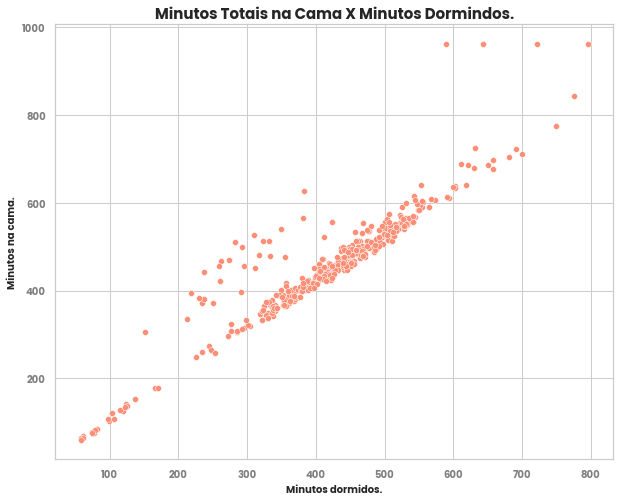

In [ ]:
#Gráfico de dispersão de tempo na cama e tempo dormido
fig, ax = plt.subplots(figsize=(10,8))


sns.scatterplot(x='TotalMinutesAsleep', y='TotalTimeInBed', data = sleep_day, color=bella_colors[1])


ax.set_ylabel('Minutos na cama.', fontproperties=fprop, fontsize=10)
ax.set_xlabel('Minutos dormidos.', fontproperties=fprop, fontsize=10)


ax.set_yticklabels(range(0,1001,200),fontproperties=fprop, color='grey')
ax.set_xticklabels(range(0,801,100),fontproperties=fprop, color='grey')

ax.set_title('Minutos Totais na Cama X Minutos Dormindos.', fontproperties=fprop, fontsize=15)

plt.plot()

In [ ]:
#correlação 
sleep_day.TotalMinutesAsleep.corr(sleep_day.TotalTimeInBed)

0.930422385392275

Existe uma correlação de 0.93 entre o tempo em que os usuários passam na cama e o tempo que eles estão adormecidos, o que faz muito sentido. Porem existem alguns pontos no gráfico de dispersão que indicam usuários passando um bom tempo na acordados na cama , seria interessante saber as causas desse fenômeno. 
* Celular? 
* Streamig? 
* Insônia?

[]

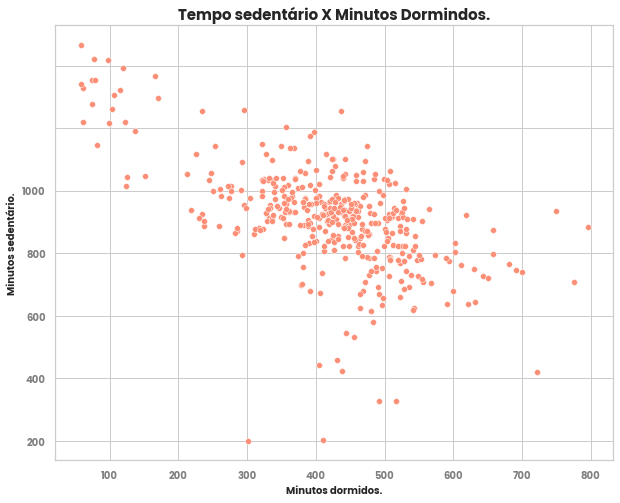

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x=merge_sleep_activity.TotalMinutesAsleep, y=merge_sleep_activity.SedentaryMinutes, data =merge_sleep_activity, color=bella_colors[1])


ax.set_ylabel('Minutos sedentário.', fontproperties=fprop, fontsize=10)
ax.set_xlabel('Minutos dormidos.', fontproperties=fprop, fontsize=10)


ax.set_yticklabels(range(0,1001,200),fontproperties=fprop, color='grey')
ax.set_xticklabels(range(0,801,100),fontproperties=fprop, color='grey')

ax.set_title('Tempo sedentário X Minutos Dormindos.', fontproperties=fprop, fontsize=15)

plt.plot()

In [ ]:
# correlação entre calorias e total de passos
print(merge_sleep_activity.SedentaryMinutes.corr(merge_sleep_activity.TotalMinutesAsleep))

-0.6010731396971011


Existe uma correlação negativa moderada entre o tempo sedentário no da e quantidade de sono, ou seja o maior tempo sedentário no dia influencia parcialmente numa menor quantidade de tempo adormecido.

[]

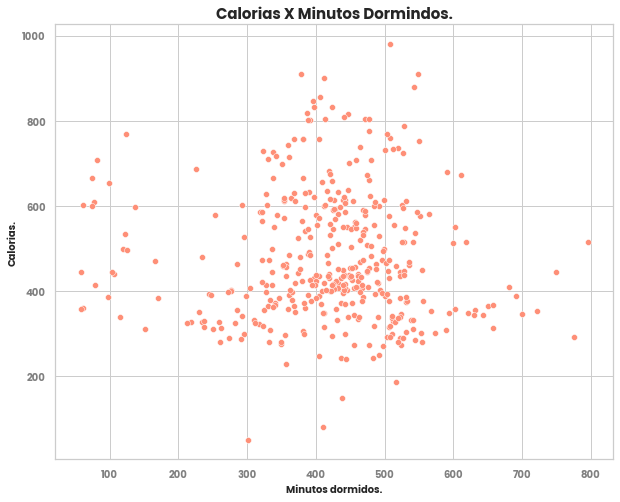

In [75]:
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x=merge_sleep_activity.TotalMinutesAsleep, y=merge_sleep_activity.Calories, data =merge_sleep_activity, color=bella_colors[1])


ax.set_ylabel('Calorias.', fontproperties=fprop, fontsize=10)
ax.set_xlabel('Minutos dormidos.', fontproperties=fprop, fontsize=10)


ax.set_yticklabels(range(0,1001,200),fontproperties=fprop, color='grey')
ax.set_xticklabels(range(0,801,100),fontproperties=fprop, color='grey')

ax.set_title('Calorias X Minutos Dormindos.', fontproperties=fprop, fontsize=15)

plt.plot()

In [ ]:
# correlação entre calorias e sono
print(merge_sleep_activity.Calories.corr(merge_sleep_activity.TotalMinutesAsleep))

-0.03169899182029161


Não existe correlação entre a quantidade de tempo adormecido e e o gasto calórico.

### Quais são os horários de maior intensidade de exercicios, existe uma rotina?

In [ ]:
hour_intensities.head()

,data,dia_semana,hora,TotalIntensity,AverageIntensity
0,4/12/2016,Tuesday,00:00:00,20,0.333333
1,4/12/2016,Tuesday,01:00:00,8,0.133333
2,4/12/2016,Tuesday,02:00:00,7,0.116667
3,4/12/2016,Tuesday,03:00:00,0,0.000000
4,4/12/2016,Tuesday,04:00:00,0,0.000000


In [ ]:
hour_intensities.describe(percentiles=[.25, .5, .75, .9, .95, .98, .99, .999])

,TotalIntensity,AverageIntensity
count,22099.000000,22099.000000
mean,12.035341,0.200589
std,21.133110,0.352219
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,0.050000
75%,16.000000,0.266667
90%,32.000000,0.533333
95%,47.000000,0.783333
98%,86.000000,1.433333


In [ ]:
#Agrupamento da media  de intensidade por hora.
grp_hour_intensities= hour_intensities.groupby('hora')['AverageIntensity'].agg(['mean'])
grp_hour_intensities.head()

,mean
hora,
00:00:00,0.035493
01:00:00,0.023651
02:00:00,0.017399
03:00:00,0.007396
04:00:00,0.010551


In [ ]:
media_total = grp_hour_intensities['mean'].mean()

[]

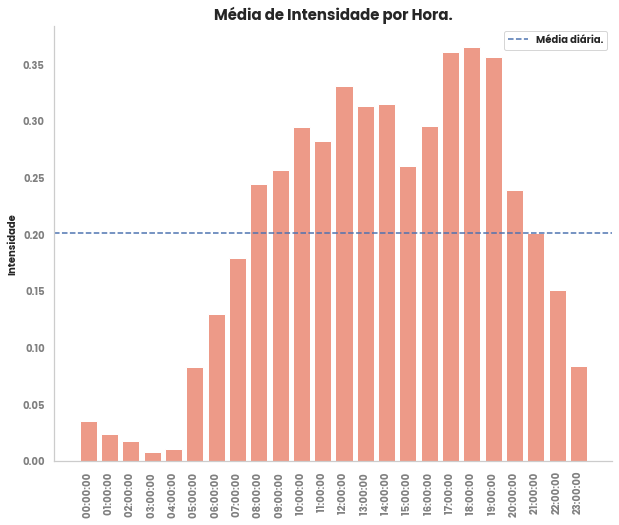

In [ ]:
#gráfico de barras
media = grp_hour_intensities['mean']
hora = grp_hour_intensities.index

fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(data=grp_hour_intensities,x=hora, y=media,
            color=bella_colors[1])

ax.axhline(media_total, linestyle='dashed', label='Média diária.')
ax.grid(False)

plt.xticks(rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(fontproperties=fprop, color='grey')
plt.yticks(fontproperties=fprop, color='grey')

plt.ylabel('Intensidade',fontproperties=fprop, fontsize=10)

plt.title('Média de Intensidade por Hora.', fontproperties=fprop, fontsize=15)
plt.legend(prop=fprop)
plt.xlabel('')
plt.plot()

A fitbit mensura a intensidade em uma escala de 0 a 3, sendo 0 o estado sedentário e 3 o estado muito ativo:

|Valor | Estado      |
|------|-------------|
|0     | Sedentário  |
|1     | Leve        |
|2     | Moderado    |
|3     | Muito ativo |

>Existe um pico de intensidade às 5 horas da manhã, possívelmente é nesse horário que os usuários estão acordando. Uma queda às 15 horas, possívelmente quando os usúarios vão almoçar. E uma queda às 20 horas, possívelmente quando eles vão dormir.

> O período ativo é das 5  às 19, possívelmente é o momento da prática de atividades físicas. Vale ressaltar, que esse período ativo, em média, não apresenta um nivel de estato muito ativo, estando na escala como uma atividade entre sedentária e leve.

[]

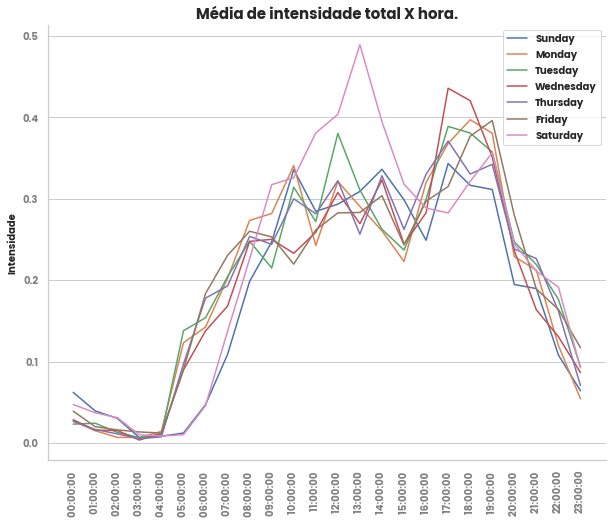

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

for i in dia_semana:  
  dia = hour_intensities.query(f'dia_semana == "{i}"').groupby(['hora'])['AverageIntensity'].agg(['mean'])
  plt.plot(dia.index, dia['mean'], label=i)


for i in ['top', 'right']:
  ax.spines[i].set_visible(False)

ax.grid(axis='x')

plt.xticks(fontproperties=fprop, color='grey',rotation=90)
plt.yticks(fontproperties=fprop, color='grey')

plt.ylabel('Intensidade',fontproperties=fprop, fontsize=10)
plt.legend(prop=fprop)
plt.title('Média de intensidade total X hora.', fontproperties=fprop, fontsize=15)
plt.plot()


> Existe um padrão para o comportamento da intensidade média, exceto para o sábado que apresenta um pico de intensidade às 13 horas enquanto que nos outros dias o pico ocorre entre às 17 e 19 horas.

In [ ]:
day_activity.head()

,Id,data,dia_semana,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


[]

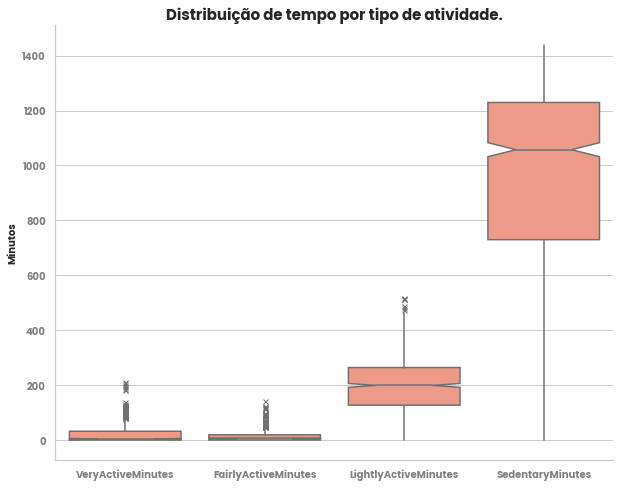

In [161]:
fig, ax = plt.subplots(figsize=(10,8))

niveis = ['VeryActiveMinutes',	'FairlyActiveMinutes','LightlyActiveMinutes',	'SedentaryMinutes']


sns.boxplot(data = day_activity[niveis], notch=True, showcaps=False,
            flierprops={"marker": "x"}, color = bella_colors[1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(fontproperties=fprop, color='grey')
plt.yticks(fontproperties=fprop, color='grey')

plt.ylabel('Minutos',fontproperties=fprop, fontsize=10)

plt.title('Distribuição de tempo por tipo de atividade.', fontproperties=fprop, fontsize=15)
plt.xlabel('')
plt.plot()        
        

A mairio dos usuários passam a maior parte do seu tempo com atividades sedentárias.

In [ ]:
#Agrupamento por dia da semana
grp_d_actv = day_activity.groupby(['dia_semana']).mean()
grp_d_actv.tail()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
dia_semana,,,,,,,,,,,,,,
Saturday,4.908075e+09,8152.975806,5.854677,5.854677,0.000000,1.514597,0.677339,3.617177,0.001048,21.919355,15.201613,207.145161,964.282258,2354.967742
Sunday,4.847640e+09,6933.231405,5.027190,5.027190,0.000000,1.488926,0.618017,2.892314,0.000661,19.983471,14.528926,173.975207,990.256198,2263.000000
Thursday,4.837277e+09,7405.836735,5.312245,5.287415,0.129283,1.390476,0.505170,3.283129,0.002313,19.408163,11.959184,185.421769,961.993197,2199.571429
Tuesday,4.851063e+09,8125.006579,5.832237,5.812829,0.169054,1.613289,0.593026,3.471053,0.001447,22.953947,14.335526,197.342105,1007.361842,2356.013158
Wednesday,4.815191e+09,7559.373333,5.488333,5.467600,0.139588,1.633467,0.527067,3.256333,0.001333,20.780000,13.100000,189.853333,989.480000,2302.620000


[]

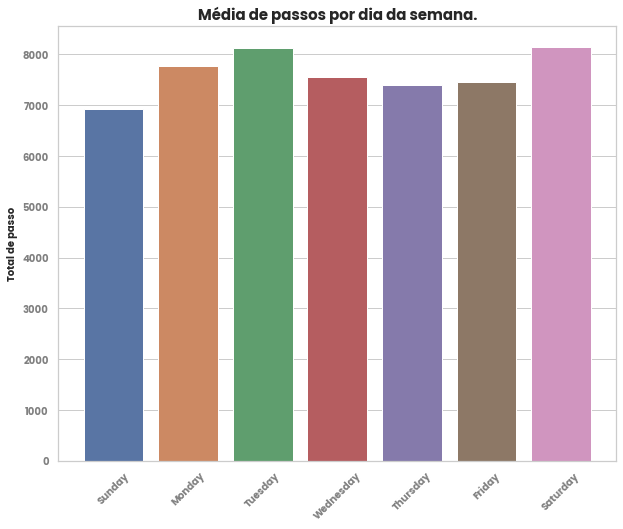

In [171]:
#passos dados por dia da semana
plt.figure(figsize=(10,8))

sns.barplot(data=grp_d_actv, x=grp_d_actv.index, y=grp_d_actv.TotalSteps, 
            order=['Sunday','Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'],
            )


plt.xticks(rotation=45)


plt.xticks(fontproperties=fprop, color='grey')
plt.yticks(fontproperties=fprop, color='grey')

plt.ylabel('Total de passo', fontproperties=fprop, fontsize=10)
plt.xlabel('')
plt.title("Média de passos por dia da semana.", fontproperties=fprop, fontsize=15)
plt.plot()


[]

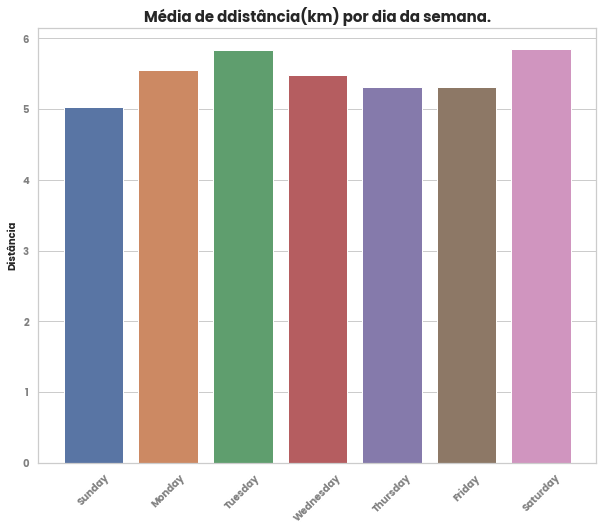

In [ ]:
#distancia por dia da semana
plt.figure(figsize=(10,8))

sns.barplot(data=grp_d_actv, x=grp_d_actv.index, y=grp_d_actv.TotalDistance, 
            order=['Sunday','Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'])


plt.xticks(rotation=45)


plt.xticks(fontproperties=fprop, color='grey')
plt.yticks(fontproperties=fprop, color='grey')

plt.ylabel('Distância', fontproperties=fprop, fontsize=10)
plt.xlabel('')
plt.title("Média de distância(km) por dia da semana.", fontproperties=fprop, fontsize=15)
plt.plot()


[]

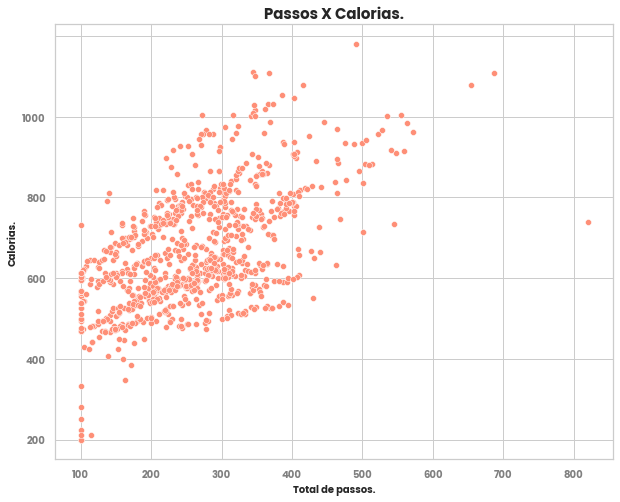

In [98]:
#Gráfico de dispersão de tempo na cama e tempo dormido
fig, ax = plt.subplots(figsize=(10,8))


sns.scatterplot(x=day_activity.TotalSteps, y=day_activity.Calories, data = day_activity, color=bella_colors[1])


ax.set_ylabel('Calorias.', fontproperties=fprop, fontsize=10)
ax.set_xlabel('Total de passos.', fontproperties=fprop, fontsize=10)


ax.set_yticklabels(range(0,1001,200),fontproperties=fprop, color='grey')
ax.set_xticklabels(range(0,801,100),fontproperties=fprop, color='grey')

ax.set_title('Passos X Calorias.', fontproperties=fprop, fontsize=15)

plt.plot()

In [ ]:
# correlação entre calorias e total de passos
print(day_activity.Calories.corr(day_activity.TotalSteps))

0.5915680862453355


Existe uma correlação moderada em relação ao tempo dormido e o total de passos por dia, o que significa que a quantidade de passos influencia parcialmente na quantidade de sono.

## Tendência no uso do dispositivo

In [141]:
#Descobrindo tempo dos usuarios no dispositivo
disp_use = day_activity[['Id','VeryActiveMinutes',	'FairlyActiveMinutes','LightlyActiveMinutes',	'SedentaryMinutes']]
disp_use['total'] = disp_use.iloc[:, 1:5].sum(axis=1)
disp_use.drop(['VeryActiveMinutes',	'FairlyActiveMinutes','LightlyActiveMinutes',	'SedentaryMinutes'], axis=1, inplace=True) 
disp_use = disp_use.groupby('Id').agg('mean')/60
disp_use.head()
media_uso = disp_use.total.mean()

<ipython-input-141-6741e06fd7a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp_use['total'] = disp_use.iloc[:, 1:5].sum(axis=1)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,total
Id,
1503960366,18.766129
1624580081,23.761828
1644430081,22.854444
1844505072,22.058065
1927972279,22.634946


[]

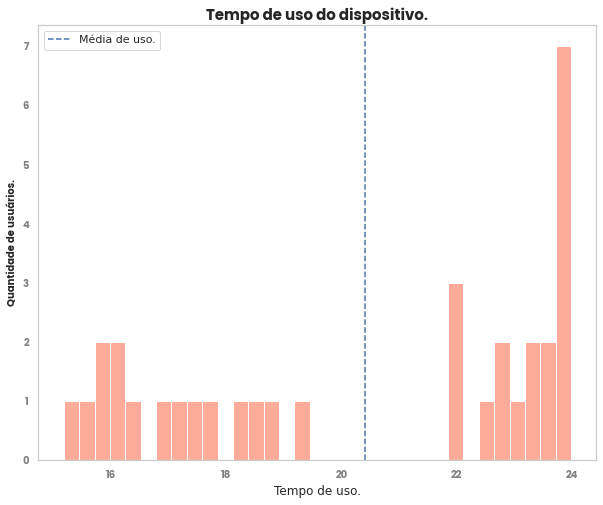

In [178]:
media_uso = disp_use.total.mean()

fig, ax = plt.subplots(figsize=(10,8))

sns.histplot(data=disp_use, x='total', bins=33, color=bella_colors[1])

ax.axvline(media_uso, linestyle='dashed', label='Média de uso.')
ax.grid(False)

plt.xticks(fontproperties=fprop, color='grey')
plt.yticks(fontproperties=fprop, color='grey')

plt.ylabel('Quantidade de usuários.', fontproperties=fprop, fontsize=10)
plt.xlabel('Tempo de uso.')
plt.title("Tempo de uso do dispositivo.", fontproperties=fprop, fontsize=15)
plt.legend()
plt.plot()

In [182]:
#usuarios que usam o dispostivo menos do que a media
len(disp_use.query(f'total < {media_uso}'))

15

15 usuários usam o dispositivo menos do que a média de tempo da amostra.

# Proposta:

Como a maioria dos usúarios não dormem o tempo necessário e nem tem uma constancia, o aplicativo da Bellabeat tem que ter a funcionalidade de performance do sono semanal, informando se o úsuario está domindo o tempo necessário, bem com um comparativo com os dias anteriores. Seria interessante nessa funcionalidade mostrar se essa performance de sono segue uma rotina, como dormir nos mesmo horários, acordar nos mesmos horários e mostrar o tempo dormido.

Como o aplicativo se conecta com outros dispositivos da marca, é de interesse da empresa investir em funcionalidade de alerta para hora de dormir, bem com orientações para uma melhor qualidade de sono, visando reduzir o tempo que se passa acordado na cama.  

Criação de notificações sonoras para a prática de alguma atividade física, principamente nos momentos de maior tempo de momentos sedentários.

Criação metas para os usuários quee incentivam a praticar mais exercícios físico. Nessa funcionalidade poderia mostrar quantos passos ou kilomêtros foi percorrido no dia e comparar com o dia anterior e propondo aos usuários darem alguns passos a mais. 

Criação de notificações, que ressaltam a importancia do uso do dispositivo para aqueles usúarios que não ficam o tempo todo com o dispositivo.

# Relatório.

In [ ]:
#Instalando biblioteca para geração de relatório.
!pip install reportlab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4

In [ ]:
cnv = canvas.Canvas("meu_pdf.pdf")
cnv.drawString()
cnv.save()

TypeError: ignored